In [1]:
# Import Object from result.json
import json

with open('result.json') as f:
    data = json.load(f)

print(data)

[{'nodes': 4, 'max_weight': 9, 'distance_matrix': [[0, 2, 7, 3], [2, 0, 2, 9], [7, 2, 0, 2], [3, 9, 2, 0]], 'interaction_matrix': [[0, 6, 8, 5], [6, 0, 1, 1], [8, 1, 0, 3], [5, 1, 3, 0]], 'weight': 1000000, 'time_model_formulation': 0.0009210109710693359, 'gurobi_objective': 162.0, 'gurobi_execution_time': 0.006965, 'fixstars_objective': 162.0, 'fixstars_execution_time': 0.98943, 'dwave_objective': 162.0, 'dwave_execution_time': 0.190521}, {'nodes': 4, 'max_weight': 9, 'distance_matrix': [[0, 9, 5, 6], [9, 0, 5, 7], [5, 5, 0, 5], [6, 7, 5, 0]], 'interaction_matrix': [[0, 2, 1, 1], [2, 0, 3, 1], [1, 3, 0, 9], [1, 1, 9, 0]], 'weight': 1000000, 'time_model_formulation': 0.0005640983581542969, 'gurobi_objective': 186.0, 'gurobi_execution_time': 0.00901, 'fixstars_objective': 186.0, 'fixstars_execution_time': 0.959602, 'dwave_objective': 186.0, 'dwave_execution_time': 0.190521}, {'nodes': 4, 'max_weight': 9, 'distance_matrix': [[0, 7, 6, 2], [7, 0, 7, 6], [6, 7, 0, 9], [2, 6, 9, 0]], 'inter

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

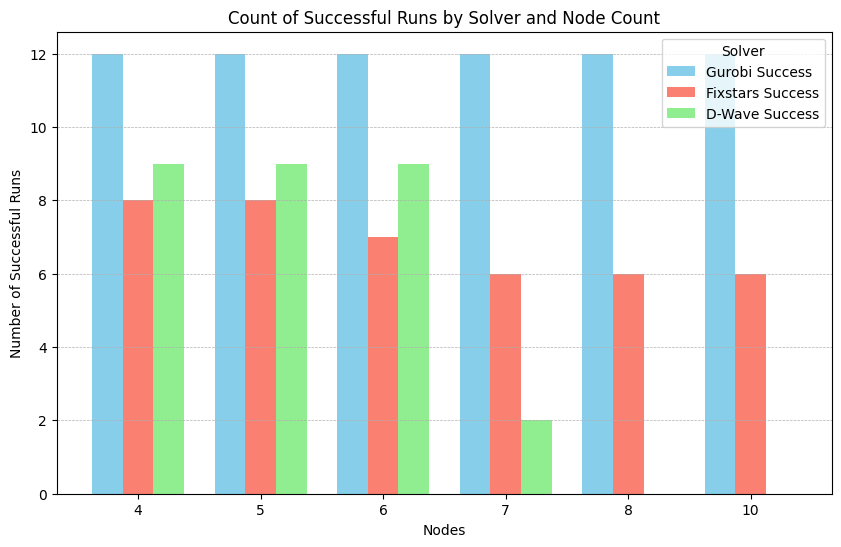

In [7]:
# Convert data to a pandas DataFrame
df = pd.DataFrame(data)

# Check for non-null objectives and execution times
success_conditions = (
    (df["gurobi_objective"].notnull()) & (df["gurobi_execution_time"].notnull()),
    (df["fixstars_objective"].notnull()) & (df["fixstars_execution_time"].notnull()),
    (df["dwave_objective"].notnull()) & (df["dwave_execution_time"].notnull())
)

# Count successes for each solver by nodes
success_counts = {
    "nodes": df["nodes"].unique(),
    "gurobi_success": [((df["nodes"] == node) & success_conditions[0]).sum() for node in df["nodes"].unique()],
    "fixstars_success": [((df["nodes"] == node) & success_conditions[1]).sum() for node in df["nodes"].unique()],
    "dwave_success": [((df["nodes"] == node) & success_conditions[2]).sum() for node in df["nodes"].unique()],
}

# Convert success_counts to DataFrame for plotting
success_df = pd.DataFrame(success_counts)

# Plotting
bar_width = 0.25
index = np.arange(len(success_df["nodes"]))

plt.figure(figsize=(10, 6))
plt.bar(index, success_df["gurobi_success"], bar_width, label="Gurobi Success", color="skyblue")
plt.bar(index + bar_width, success_df["fixstars_success"], bar_width, label="Fixstars Success", color="salmon")
plt.bar(index + 2 * bar_width, success_df["dwave_success"], bar_width, label="D-Wave Success", color="lightgreen")

# Adding labels and title
plt.xlabel("Nodes")
plt.ylabel("Number of Successful Runs")
plt.title("Count of Successful Runs by Solver and Node Count")
plt.xticks(index + bar_width, success_df["nodes"])
plt.legend(title="Solver")

plt.grid(axis='y', linestyle='--', linewidth=0.5)
plt.show()

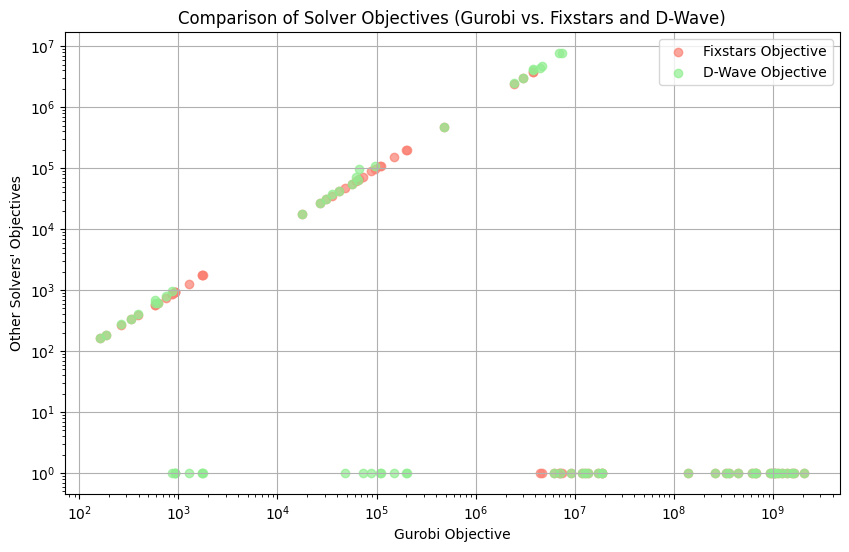

In [ ]:
# Convert data to a pandas DataFrame
df = pd.DataFrame(data)

# Replace null objectives with zero
df[['gurobi_objective', 'fixstars_objective', 'dwave_objective']] = df[['gurobi_objective', 'fixstars_objective', 'dwave_objective']].fillna(1)

# Plotting
plt.figure(figsize=(10, 6))

# Scatter plots
plt.scatter(df['gurobi_objective'], df['fixstars_objective'], color='salmon', label='Fixstars Objective', alpha=0.7)
plt.scatter(df['gurobi_objective'], df['dwave_objective'], color='lightgreen', label='D-Wave Objective', alpha=0.7)

plt.xscale("log")
plt.yscale("log")

# # Adding y=x line for reference
# x_vals = df['gurobi_objective']
# plt.plot(x_vals, x_vals, color='blue', linestyle='--', label='y = x line')

# Adding labels and title
plt.xlabel("Gurobi Objective")
plt.ylabel("Other Solvers' Objectives")
plt.title("Comparison of Solver Objectives (1 for failed runs)")
plt.legend()
plt.grid()

plt.show()

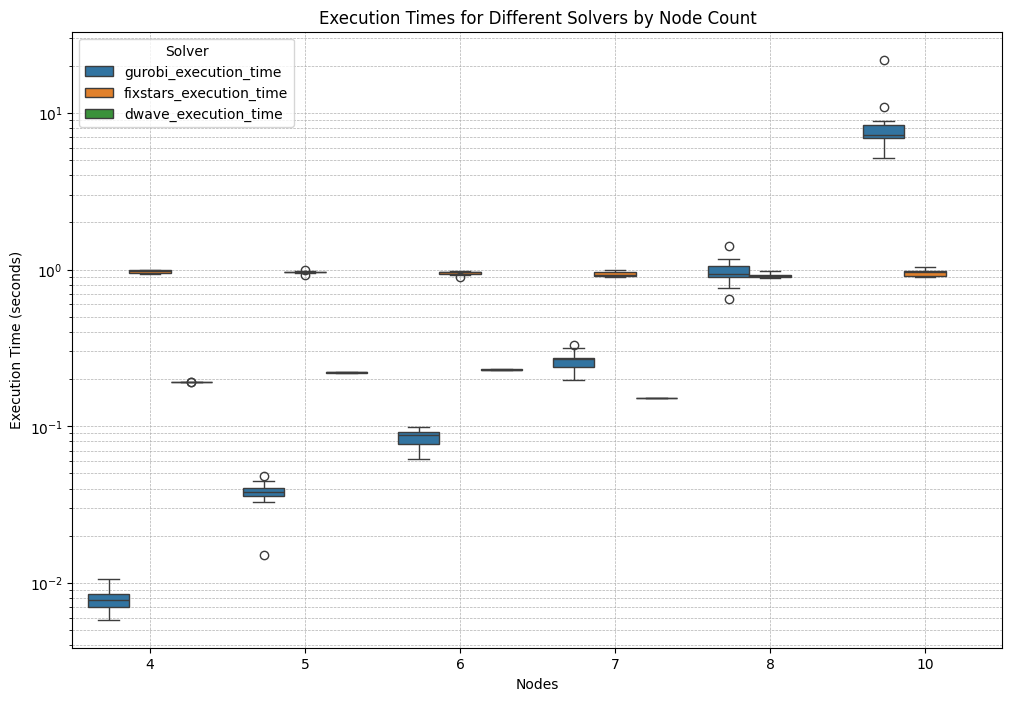

In [ ]:
# Plot Box and Whisker plot where nodes are on x-axis and time for each solver in y-axis

# Convert data to a pandas DataFrame for easy plotting
df = pd.DataFrame(data)

# Melt the DataFrame to have a long-form format suitable for Seaborn boxplot
df_melted = df.melt(id_vars=["nodes"], 
                    value_vars=["gurobi_execution_time", "fixstars_execution_time", "dwave_execution_time"], 
                    var_name="solver", 
                    value_name="execution_time")

# Plotting
plt.figure(figsize=(12, 8))
sns.boxplot(data=df_melted, x="nodes", y="execution_time", hue="solver")
plt.yscale("log")

# Adding labels and title
plt.xlabel("Nodes")
plt.ylabel("Execution Time (seconds)")
plt.title("Execution Times for Different Solvers by Node Count")
plt.legend(title="Solver")
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.show()

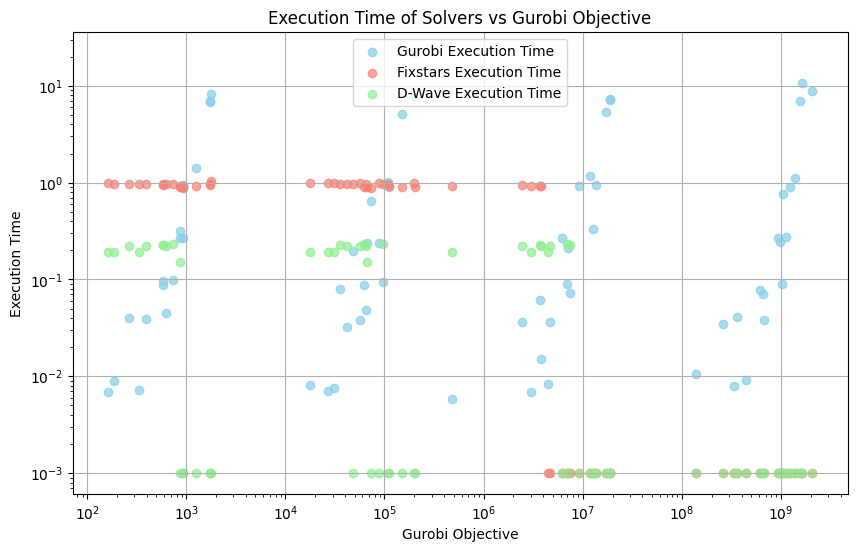

In [27]:
# Convert data to a pandas DataFrame
df = pd.DataFrame(data)

# Replace null execution times with 10^-3
df[['gurobi_execution_time', 'fixstars_execution_time', 'dwave_execution_time']] = df[['gurobi_execution_time', 'fixstars_execution_time', 'dwave_execution_time']].fillna(0.001)

# Plotting
plt.figure(figsize=(10, 6))

# Scatter plots for execution times
plt.scatter(df['gurobi_objective'], df['gurobi_execution_time'], color='skyblue', label='Gurobi Execution Time', alpha=0.7)
plt.scatter(df['gurobi_objective'], df['fixstars_execution_time'], color='salmon', label='Fixstars Execution Time', alpha=0.7)
plt.scatter(df['gurobi_objective'], df['dwave_execution_time'], color='lightgreen', label='D-Wave Execution Time', alpha=0.7)

plt.xscale("log")
plt.yscale("log")

# Adding labels and title
plt.xlabel("Gurobi Objective")
plt.ylabel("Execution Time")
plt.title("Execution Time of Solvers vs Problem Size (Answer)")
plt.legend()
plt.grid()

plt.show()